In [1]:
# It allows you to handle the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary packages for visualization i.e Matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,4
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline  

In [3]:
# Importing the data file
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
# Looking for missing data
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# Department Wise Performance

In [5]:
# Let us take the variables EmpDepartment and PerformanceRating in a new pandas Dataframe.
data1 = data.iloc[:,[5,27]].copy()
req_data = data1.copy()
req_data

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3
5,Development,4
6,Sales,3
7,Development,3
8,Development,3
9,Development,3


In [6]:
# It allows what are the variables contains in the EmpDepartment attribute and it counts how many variables on it.
req_data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [7]:
# Finding out the mean performance of all the departments
req_data.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

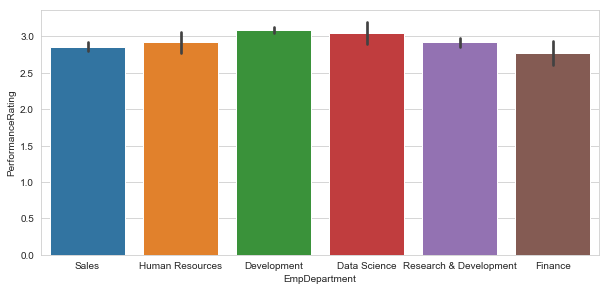

In [8]:
# Plotting mean performance of all the departments bar graph using seaborn.
plt.figure(figsize=(10,4.5))
sb.barplot(req_data['EmpDepartment'],req_data['PerformanceRating'])

In [9]:
# Analyze each department separately
req_data.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [12]:
# Creating a new dataframe to analyze each department separately.
# Here i am using get_dummies library which means it converts categorical variable into dummy/indicator variables.
department = pd.get_dummies(req_data['EmpDepartment'])
performance = pd.DataFrame(req_data['PerformanceRating'])

In [13]:
# Cancating the dapartment and performance data into new dataframe
new_data = pd.concat([department,performance],axis=1)

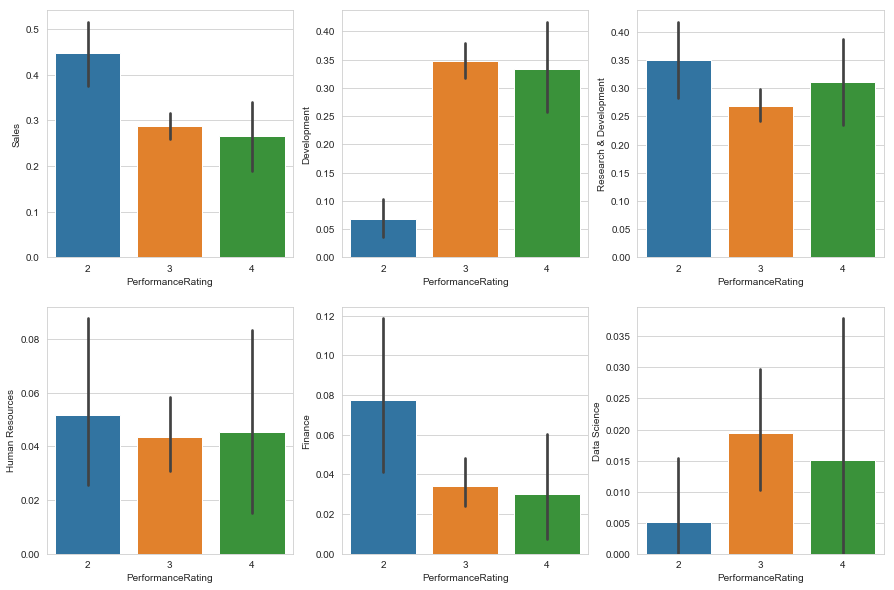

In [14]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sb.barplot(new_data['PerformanceRating'],new_data['Sales'])
plt.subplot(2,3,2)
sb.barplot(new_data['PerformanceRating'],new_data['Development'])
plt.subplot(2,3,3)
sb.barplot(new_data['PerformanceRating'],new_data['Research & Development'])
plt.subplot(2,3,4)
sb.barplot(new_data['PerformanceRating'],new_data['Human Resources'])
plt.subplot(2,3,5)
sb.barplot(new_data['PerformanceRating'],new_data['Finance'])
plt.subplot(2,3,6)
sb.barplot(new_data['PerformanceRating'],new_data['Data Science'])
plt.show()